# Pandas and Numpy Introduction

In [12]:
import numpy as np
import pandas as pd
#!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
zero_vector = np.zeros(3)
print(zero_vector)

[0. 0. 0.]


In [14]:
list1 = [10, 20, 30]
list1

[10, 20, 30]

In [15]:
arr1 = np.array(list1)
arr1

array([10, 20, 30])

In [16]:
list1 * 2

[10, 20, 30, 10, 20, 30]

In [17]:
x = pd.Series([10, 20, 30], index = ['a', 'b', 'c'])
x

a    10
b    20
c    30
dtype: int64

In [18]:
new_x = pd.Series(x, index = ['a', 'b', 'c', 'd'])
new_x

a    10.0
b    20.0
c    30.0
d     NaN
dtype: float64

In [19]:
np.isnan(new_x), pd.isnull(new_x)

(a    False
 b    False
 c    False
 d     True
 dtype: bool,
 a    False
 b    False
 c    False
 d     True
 dtype: bool)

In [20]:
titanic = sns.load_dataset('titanic')

# Inspecting the Titanic Dataset

## Missing Values

In [21]:
pd.set_option("display.max_rows", 20)
display(titanic)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [22]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

The dataframe has some missing values. The column most at fault for the majority of the missing data is 'deck'. Due to this column holding a categorical data type of which deck the passenger's were allocated to, it would be impossible to fill them with values. The deck is also mostly NaN values, about 77%, so it's safe to say we will look to remove this column.

<BarContainer object of 7 artists>

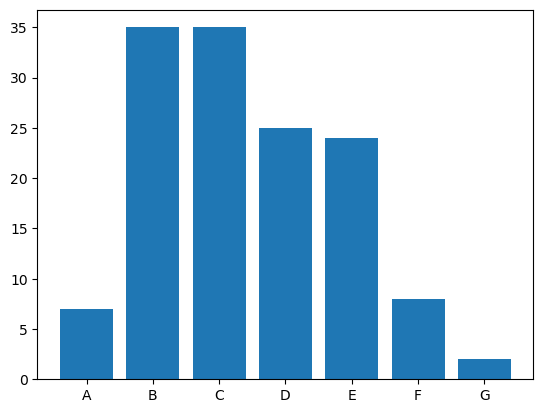

In [23]:
plt.bar(x = titanic.groupby("deck")["survived"].sum().index, height = titanic.groupby("deck")["survived"].sum().values)

Although we can derive visualisations from the available data, it is not possible to use these to offer conclusions as there is far too much missing data. The incompleteness of the column depletes the value of the bar chart above, which would show the survival rate for each deck.

In [24]:
#titanic.shape
#titanic.isnull().sum()['deck']/titanic.shape[0]

There are two rows, Row 829 and Row 61, where 'embarked' and 'embark_town' are both null values. Both were women that survived and had fares of 80.00. The only thing that differs between them are their ages. This has potential to be a duplicate, but there is no way to know which one is the original person. It is also possible, yet unlikely, that two very similar people were coincidingly residing on the same deck, while completely separate from each other as 'alone' == True. It is better to just leave the rows be, as these could still be important in the future. Seeing as these are only two missing values in each column, we don't have to drop these rows.

In [25]:
titanic.loc[titanic['fare'] == 80.00]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


As for the missing 'age' values, from the cell below, it doesn't seem like there's a common factor in the rows that are missing their ages. Seeing as about 20% of the age values are missing, a large but not worrying amount, it would be best to replace the NaN age values with the mean age value if we were to deal with this issue, and not remove them. We will execute this change after the EDA to see if we encounter any problems first.

In [26]:
titanic.loc[pd.isnull(titanic['age'])]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


Here's the cleaned dataframe with 'deck' removed.

In [27]:
titanic_clean = titanic.drop(['deck'], axis = 1)
titanic_clean

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


## Duplicates

There are a lot of duplicate values, there are 107 rows found using pd.duplicated().

In [28]:
#titanic.loc[titanic.duplicated()].shape
titanic.loc[titanic.duplicated()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
47,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
77,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
87,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


In [29]:
titanic.loc[titanic['age'].isnull and titanic['fare'] == 7.7500]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
32,1,3,female,NaN,0,0,7.75,Q,Third,woman,False,NaN,Queenstown,yes,True
47,1,3,female,NaN,0,0,7.75,Q,Third,woman,False,NaN,Queenstown,yes,True
116,0,3,male,70.5,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True
126,0,3,male,NaN,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True
141,1,3,female,22.0,0,0,7.75,S,Third,woman,False,NaN,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0,3,male,18.0,0,0,7.75,S,Third,man,True,NaN,Southampton,no,True
776,0,3,male,NaN,0,0,7.75,Q,Third,man,True,F,Queenstown,no,True
790,0,3,male,NaN,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True
828,1,3,male,NaN,0,0,7.75,Q,Third,man,True,NaN,Queenstown,yes,True


Due to the dataframe, not having a real-life primary key, such as a full name column, it is tricky to determine whether these are true duplicates. It is entirely likely that mistakes were made in collecting these data, and that the different passenger information was collected from several different sources made a long time ago, which themselves contained duplicates. The duplicated rows could possibly included because the original data collectors didn't know themselves what to do with them.

In our case, I think we will be better off removing these duplicate values seeing as they could potentially remove some NaN values as well.

In [30]:
titanic_droppeddupes_cleaned = titanic_clean.drop_duplicates()
# Simpler variable name to indicate cleaned DF
titanic_dc = titanic_droppeddupes_cleaned
titanic_dc

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


## Renaming Columns

It is common practice to name boolean columns something starting with 'is...'. Therefore, we could rename the columns 'adult_male' and 'alone' to 'is_adultmale' and 'is_alone' respectively. We will leave survived be as there is no option that makes grammatical sense, and this is mainly just a formality to indicate the column's data type easier.

In [31]:
 titanic_dc = titanic_dc.rename(columns = {'adult_male': 'is_adultmale', 'alone': 'is_alone'})

In [32]:
titanic_dc

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,is_adultmale,embark_town,alive,is_alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


Going from the data source at https://www.kaggle.com/c/titanic/data, perhaps we could rename 'pclass' (Ticket class), 'sibsp' (# of siblings / spouses aboard the Titanic), 'parch'	(# of parents / children aboard the Titanic) to 'ticket_class', 'siblings_spouses_no' and 'parents_children_no'.

In [33]:
titanic_dc = titanic_dc.rename(columns = {'pclass': 'ticket_class', 'sibsp': 'sibling_spouse_no', 'parch': 'parent_children_no'})

In [34]:
titanic_dc

,survived,ticket_class,sex,age,sibling_spouse_no,parent_children_no,fare,embarked,class,who,is_adultmale,embark_town,alive,is_alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


## Other Data Cleaning Concepts

There is some redundancy still remaining in the dataset. In my opinion, there are a few columns that can be removed:
* 'is_adultmale' is redundant as this value can be inferred from the columns 'sex' and 'who'. 
* the column 'alive' which is just a string version of the column 'survived' where 'yes'/'no' replace 1/0 
* the column 'embarked' truncates the 'embark_town' column to the first letter
* the column 'class' which puts the 'ticket_class' into words First, Second and Third from 1, 2 and 3.
* the column 'is_alone' which is True when 'sibling_spouse_no' and 'parent_children_no' are both 0.
These columns should be removed due to redundancy without fear of losing completeness in the dataset, as the data is already present in other forms.

In [35]:
titanic_final = titanic_dc.drop(['is_adultmale', 'alive', 'embarked', 'class', 'is_alone'], axis = 1)

In [36]:
titanic_final

,survived,ticket_class,sex,age,sibling_spouse_no,parent_children_no,fare,who,embark_town
0,0,3,male,22.0,1,0,7.2500,man,Southampton
1,1,1,female,38.0,1,0,71.2833,woman,Cherbourg
2,1,3,female,26.0,0,0,7.9250,woman,Southampton
3,1,1,female,35.0,1,0,53.1000,woman,Southampton
4,0,3,male,35.0,0,0,8.0500,man,Southampton
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,woman,Queenstown
887,1,1,female,19.0,0,0,30.0000,woman,Southampton
888,0,3,female,NaN,1,2,23.4500,woman,Southampton
889,1,1,male,26.0,0,0,30.0000,man,Cherbourg


# Analysis of Cleaned Dataset

## Using describe()

The following descriptive table lets us make a few observations:
* that there were more deaths than survivals during the Titanic as the mean for 'survived' is below 0.5 so there are more 0 than 1 values.
* the average age was around 30 years old (considering there are some NaN values), and the standard deviation and quartiles show us that the age ranges around 20 to 30 and 30 to 40 are mostly populated, with the age ranges outside dropping off in population. So, there were relatively few older people on board, as 
    * mean +- (3 * SD) = [0, 72] years old which encompasses 99% of the population
    * mean +- (2 * SD) = [2, 58] years old which encompasses 95%. 
    * It is safe to say the max value of 80 years old may be an outlier.
* there is a possible outlier for maximum fare of $512, as it lies far outside the interquartile range. It is possible that this could be a mistake, however, this just seems like a super deluxe package that people were unlucky to spend a lot of money on, as from looking at the value_counts() function, 3 people spent this much money on a fare. These three people don't seem to be duplicates as well, from looking at their rows. This happens to show the range of people that the Titanic attracted.

In [37]:
titanic_final.describe()

,survived,ticket_class,age,sibling_spouse_no,parent_children_no,fare
count,780.000000,780.000000,676.000000,780.000000,780.000000,780.000000
mean,0.412821,2.246154,29.812751,0.525641,0.417949,34.829108
std,0.492657,0.854452,14.727098,0.988046,0.838536,52.263440
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.950000
75%,1.000000,3.000000,39.000000,1.000000,1.000000,34.375000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [38]:
titanic_final[titanic_final["fare"] == 512.329200]

,survived,ticket_class,sex,age,sibling_spouse_no,parent_children_no,fare,who,embark_town
258,1,1,female,35.0,0,0,512.3292,woman,Cherbourg
679,1,1,male,36.0,0,1,512.3292,man,Cherbourg
737,1,1,male,35.0,0,0,512.3292,man,Cherbourg


## Grouping by Ticket Class

In [39]:
average_fare_by_class = pd.Series(titanic_final.groupby("ticket_class")["fare"].mean(), index = [1, 2, 3])
average_age_by_class = pd.Series(titanic_final.groupby("ticket_class")["age"].mean(), index = [1, 2, 3])
DataFrame_fare_age_by_class = pd.DataFrame([average_fare_by_class, average_age_by_class],  columns = ["Average Fare by Class", "Average Age by Class"])
DataFrame_fare_age_by_class2 = pd.concat([average_fare_by_class, average_age_by_class], axis=1)
DataFrame_fare_age_by_class2

,fare,age
1,85.159631,38.181630
2,21.889279,29.859684
3,13.670843,25.180150


In [40]:
#titanic_final["fare"]/titanic_final["fare"].sum()

### Adding extra column denoting the percentage of total fare

In [41]:
#titanic_final = titanic_final.drop(["Fare Percentage of Total Fare"], axis = 1)
titanic_final.insert(7, "Fare Percentage of Total Fare", titanic_final["fare"]/titanic_final["fare"].sum())

In [42]:
titanic_final

,survived,ticket_class,sex,age,sibling_spouse_no,parent_children_no,fare,Fare Percentage of Total Fare,who,embark_town
0,0,3,male,22.0,1,0,7.2500,0.000267,man,Southampton
1,1,1,female,38.0,1,0,71.2833,0.002624,woman,Cherbourg
2,1,3,female,26.0,0,0,7.9250,0.000292,woman,Southampton
3,1,1,female,35.0,1,0,53.1000,0.001955,woman,Southampton
4,0,3,male,35.0,0,0,8.0500,0.000296,man,Southampton
...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,0.001072,woman,Queenstown
887,1,1,female,19.0,0,0,30.0000,0.001104,woman,Southampton
888,0,3,female,NaN,1,2,23.4500,0.000863,woman,Southampton
889,1,1,male,26.0,0,0,30.0000,0.001104,man,Cherbourg


The following bar chart shows how different embarking towns would usually correlate with different fare expenses. These columns are also split up into sexes. Cherbourg, France seemed to have the highest percentage of the total fare. It seems like women were responsible for the highest percentage of total fare among the embarking towns. 

Text(0, 0.5, 'Average percentage of total fare')

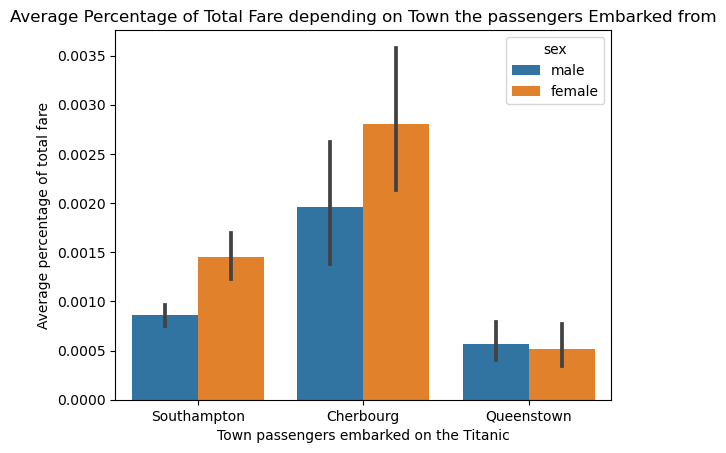

In [65]:
sns.barplot(data = titanic_final, x = "embark_town", y = "Fare Percentage of Total Fare", hue = "sex")
plt.title("Average Percentage of Total Fare depending on Town the passengers Embarked from")
plt.xlabel("Town passengers embarked on the Titanic")
plt.ylabel("Average percentage of total fare")

The graph

<Axes: xlabel='embark_town', ylabel='survived'>

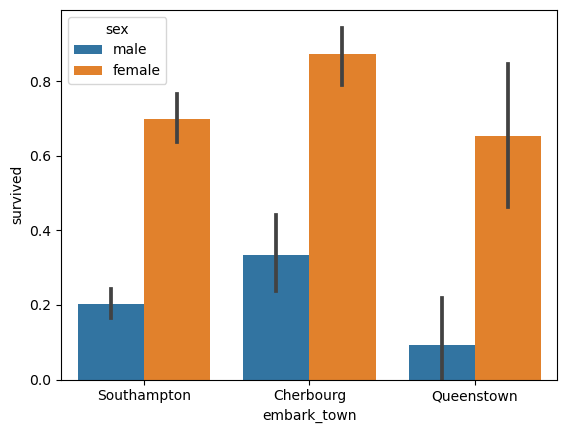

In [66]:
sns.barplot(data = titanic_final, x = "embark_town", y = "survived", hue = "sex")

With the following dataframe which collects the number of survivors and victims grouped by gender, we can make some observations. The phrase 'women and children first' came to full effect on the Titanic, as the highest value here belongs to males that perished in the disaster. This was possibly due to men attempting to find all the small children and women within the sinking ship, while sadly some failed to make it out themselves.
Was this search and rescue worthwhile however? It appears that the next highest value is the women that survived the disaster. It is not possible to come to conclusions from this data alone, but the data certainly fits with the notion that men would not be allowed to leave the boat before rescuing all the women and children, also known as the [Birkenhead Drill](https://en.wikipedia.org/wiki/Women_and_children_first): <br> 
*The phrase was popularised by its usage on RMS Titanic.[14] Second Officer Charles Lightoller suggested to Captain Smith, "Hadn't we better get the women and children into the boats, sir?", to which the captain responded: "Put the women and children in and lower away."[15] The first and second officers (William McMaster Murdoch and Lightoller) interpreted the evacuation order differently; Murdoch took it to mean women and children first, while Lightoller took it to mean women and children only. Second Officer Lightoller lowered lifeboats with empty seats if there were no women and children waiting to board, while First Officer Murdoch allowed a limited number of men to board if all the nearby women and children had embarked.[16] As a consequence, **74% of the women and 52% of the children on board were saved**, but **only 20% of the men**.[17] **Some officers on the Titanic misinterpreted the order from Captain Smith, and tried to prevent men from boarding the lifeboats**.*

In [43]:
female_passengers = titanic_final[titanic_final['sex'] == 'female']
male_passengers = titanic_final[titanic_final['sex'] == 'male']

survived_female_count = female_passengers[female_passengers['survived'] == 1].shape[0]
died_female_count = female_passengers[female_passengers['survived'] == 0].shape[0]

survived_male_count = male_passengers[male_passengers['survived'] == 1].shape[0]
died_male_count = male_passengers[male_passengers['survived'] == 0].shape[0]


#[[survived_female_count, died_female_count], [survived_male_count, died_male_count]]
DataFrame_fare_age_by_class = pd.DataFrame([[survived_female_count, died_female_count], [survived_male_count, died_male_count]], index = ["Female", "Male"],  columns = ["Survived", "Died"])
DataFrame_fare_age_by_class

,Survived,Died
Female,216,76
Male,106,382


In [44]:
#Check the rows of people who died and people who survived.

The following bar charts demonstrate almost the same survival rates as the Wikipedia article above, for each gender and including children.

<Axes: xlabel='sex', ylabel='survived'>

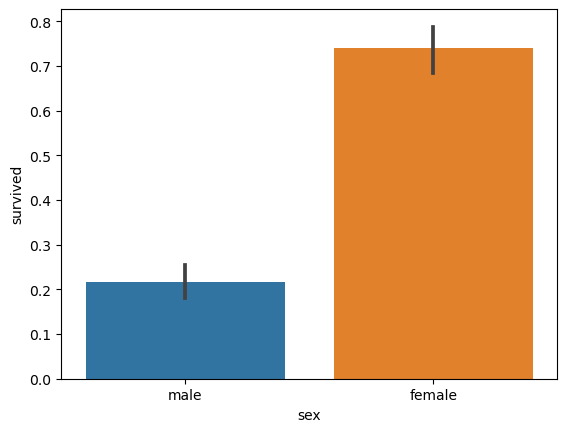

In [49]:
sns.barplot(data = titanic_final, x = "sex", y = "survived")

([<matplotlib.axis.XTick at 0x16c711b0490>], [Text(0, 0, ' ')])

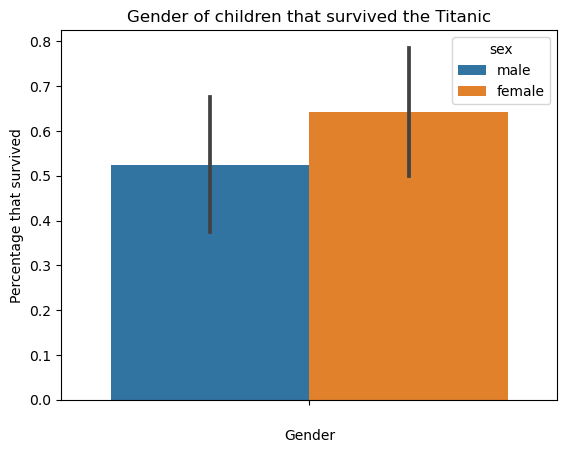

In [58]:
titanic_children = titanic_final[titanic_final["who"] == "child"]
sns.barplot(data = titanic_children, x = "who", y = "survived", hue = "sex")
plt.title("Gender of children that survived the Titanic")
plt.xlabel("Gender")
plt.ylabel("Percentage that survived")
plt.xticks(ticks=range(1), labels=[" "])

## Heatmaps

In order to produce a heatmap, we need to consider various things:
* we can only use numeric values to measure correlation
* we will need to remove outliers
* we will need to fill or drop missing values.

C:\Users\sammy\AppData\Local\Temp\ipykernel_25492\194079693.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = titanic_final.corr()


<Axes: >

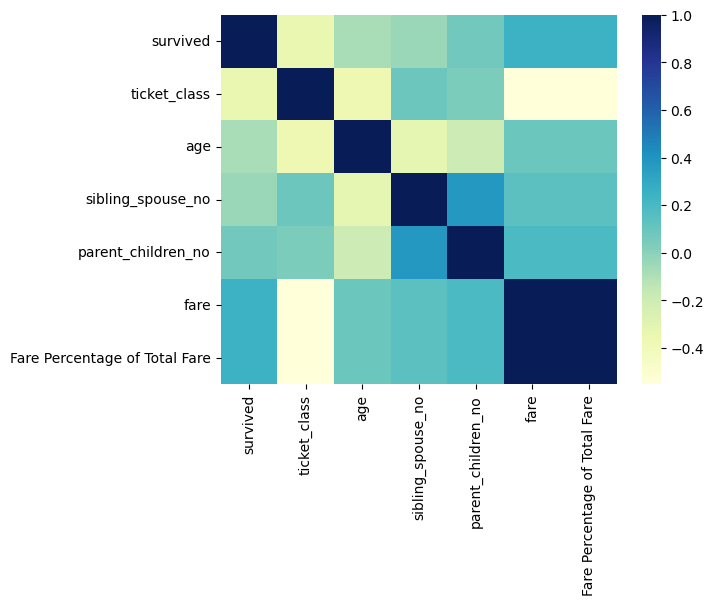

In [88]:
#titanic_final["age"].values
#pivot_table = titanic_final.pivot_table(index='age', columns='Fare Percentage of Total Fare', aggfunc=len, fill_value=0)
correlation_matrix = titanic_final.corr()
#pivot_table
#plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='YlGnBu')
#sns.pairplot(titanic_final)